[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/populationcodes/random-matrix-gallery/HEAD?urlpath=%2Fdoc%2Ftree%2Fensembles%2FpseudoInverse.ipynb)

In [1]:
import plot
import utils

import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./presentation.mplstyle')

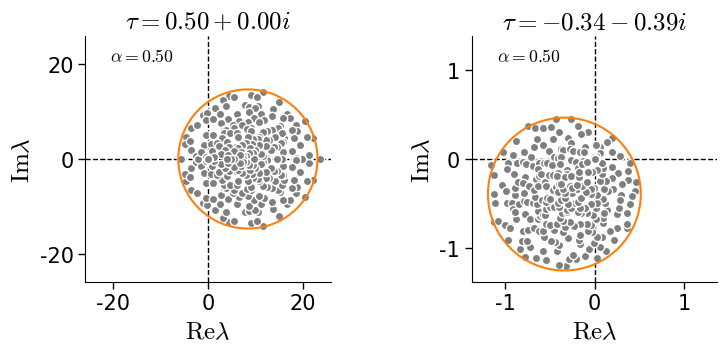

In [2]:
utils.init_randomness(2)

N = 500
P = 250
alpha = P/N
beta = np.maximum(alpha, 1/alpha)
tau = 0.5

fig, s = plt.subplots(1, 2, figsize=(4*2, 4))

cx = s[0]
mu=np.array([0/N, 0/N])
V = utils.sample_2d_real(N, P, tau, mu).astype('complex')
assert V.shape == (N*P, 2)
s1 = np.std(V[:, 0])*math.sqrt(N)
s2 = np.std(V[:, 1])*math.sqrt(N)
tau = np.corrcoef(V.T)[0, 1]

R0 = V[:,0].reshape(N, P)
R1 = V[:,1].reshape(N, P)
X = R0@np.linalg.pinv(R1)
z = np.linalg.eigvals(X)
plot.show_complex_spectrum(cx, z, [s1/s2*np.sqrt((1-np.abs(tau)**2)/(beta-1)), s1/s2*np.sqrt((1-np.abs(tau)**2)/(beta-1))], 
    center=[np.real(tau)*s1/s2, np.imag(tau)*s1/s2])
plot.text(cx, 0.1, 0.9, '$\\alpha=%1.2f$'%alpha, fontsize='xx-small')
cx.set_title('$\\tau=%1.2f%+1.2fi$'%(np.real(tau), np.imag(tau)))

cx = s[1]
mu = np.zeros(4)
V = utils.sample_2d_complex(N, P, mu).astype('complex')
assert V.shape == (N*P, 2)
s1 = np.std(V[:, 0])*math.sqrt(N)
s2 = np.std(V[:, 1])*math.sqrt(N)
tau = np.corrcoef(V.T)[0, 1]

R0 = V[:,0].reshape(N, P)
R1 = V[:,1].reshape(N, P)
X = R0@np.linalg.pinv(R1)
z = np.linalg.eigvals(X)
plot.show_complex_spectrum(cx, z, [s1/s2*np.sqrt((1-np.abs(tau)**2)/(beta-1)), s1/s2*np.sqrt((1-np.abs(tau)**2)/(beta-1))], 
    center=[np.real(tau)*s1/s2, np.imag(tau)*s1/s2])
plot.text(cx, 0.1, 0.9, '$\\alpha=%1.2f$'%alpha, fontsize='xx-small')
cx.set_title('$\\tau=%1.2f%+1.2fi$'%(np.real(tau), np.imag(tau)))

name = utils.get_script_name()
if name is not None:
    fig.savefig("../images/%s.png"%name)
plt.show()

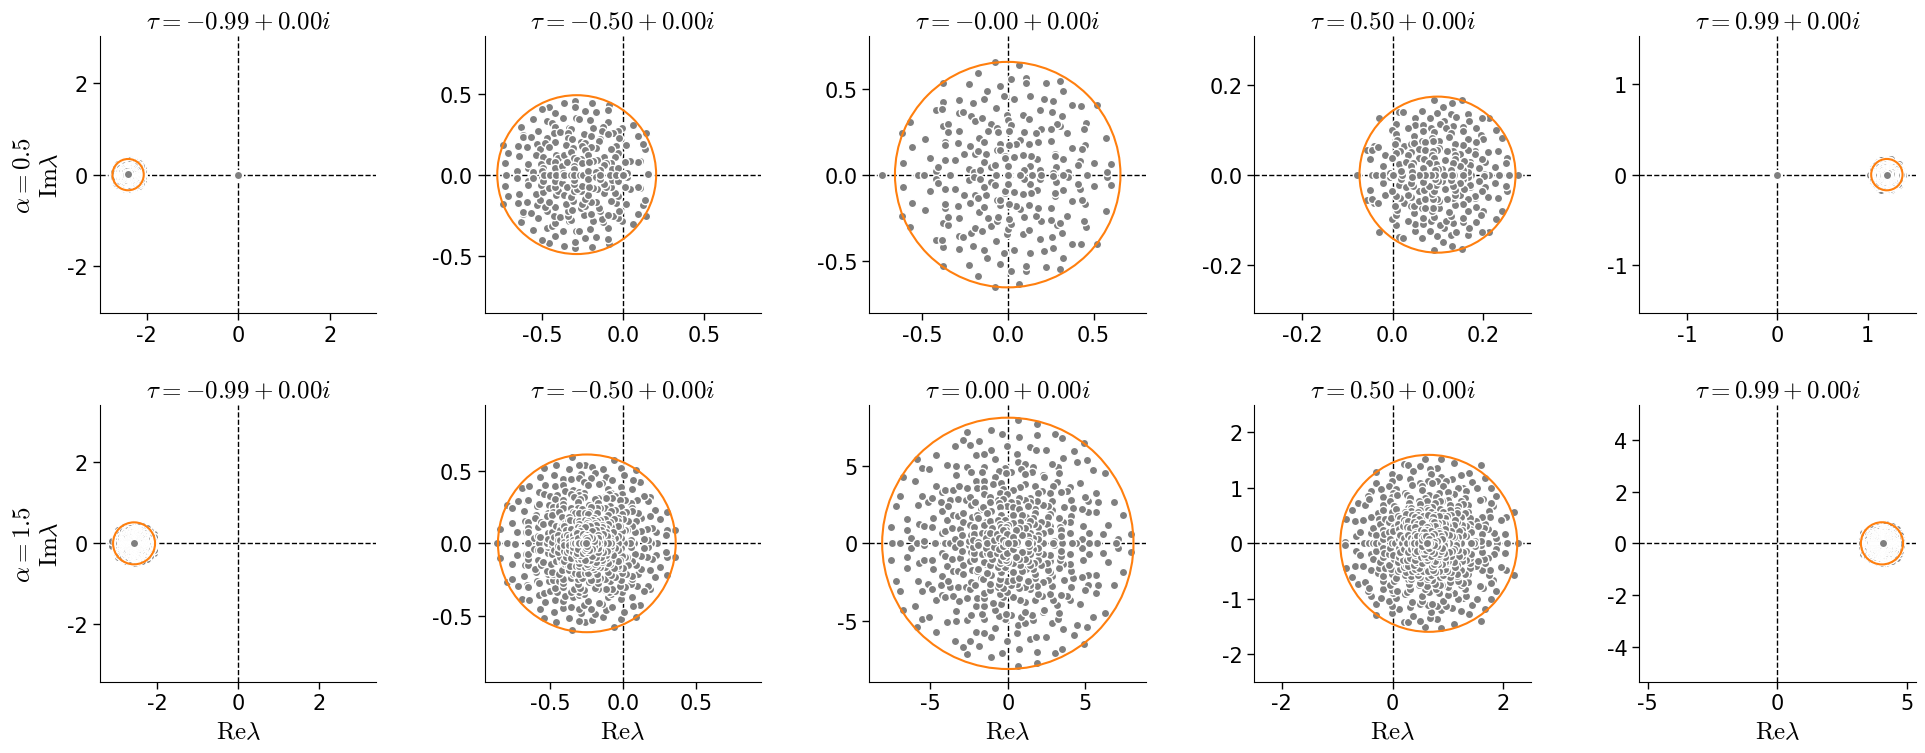

In [3]:
N = 500
ALPHAs = [0.5, 1.5]
TAUs = [-0.99, -0.5, 0, 0.5, 0.99]
fig, s = plt.subplots(2, len(TAUs), figsize=(4*len(TAUs), 4*2))
for j in range(len(ALPHAs)):
    P = int(ALPHAs[j]*N)
    alpha = P/N
    beta = np.maximum(alpha, 1/alpha)

    for i in range(len(TAUs)):
        tau = TAUs[i]

        mu=np.array([0/N, 0/N])
        V = utils.sample_2d_real(N, P, tau, mu).astype('complex')
        s1 = np.std(V[:, 0])*math.sqrt(N)
        s2 = np.std(V[:, 1])*math.sqrt(N)
        tau = np.corrcoef(V.T)[0, 1]

        assert V.shape == (N*P, 2)

        R0 = V[:,0].reshape(N, P)
        R1 = V[:,1].reshape(N, P)
        X = R0@np.linalg.pinv(R1)
        z = np.linalg.eigvals(X)

        cx = s[j,i]
        plot.show_complex_spectrum(cx, z, [s1/s2*np.sqrt((1-np.abs(tau)**2)/(beta-1)), s1/s2*np.sqrt((1-np.abs(tau)**2)/(beta-1))], 
            center=[np.real(tau)*s1/s2, np.imag(tau)*s1/s2])
        cx.set_title('$\\tau=%1.2f%+1.2fi$'%(np.real(tau), np.imag(tau)))

        if j < len(ALPHAs)-1:
            cx.set_xlabel('')
        if i == 0:
            cx.set_ylabel('$\\alpha=%1.1f$\n$\\mathrm{Im}\\lambda$'%alpha)
        else:
            cx.set_ylabel('')

C:\Users\urico\AppData\Local\Temp\ipykernel_27760\1619401703.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  cx.set_ylabel('$\\tau=%1.1f$\n$\\mathrm{Im}\\lambda$'%tau)
c:\Users\urico\Projects\random-matrix-gallery\ensembles\utils.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
  V = np.random.multivariate_normal(mu, covs, N*P).astype('complex')


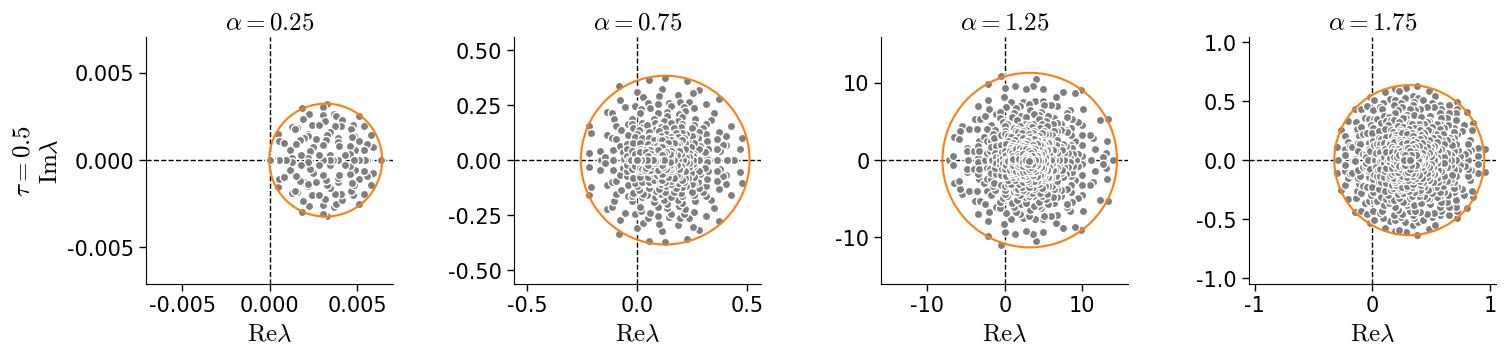

In [4]:
tau = 0.5
ALPHAs = [0.25, 0.75, 1.25, 1.75]
fig, s = plt.subplots(1, len(ALPHAs), figsize=(4*len(ALPHAs), 4))
for i in range(len(ALPHAs)):
    N = 500
    P = int(ALPHAs[i]*N)
    alpha = P/N
    beta = np.maximum(alpha, 1/alpha)
    mu = np.array([0/N, 0/N])
    V = utils.sample_2d_real(N, P, tau, mu).astype('complex')
    assert V.shape == (N*P, 2)
    s1 = np.std(V[:, 0])*math.sqrt(N)
    s2 = np.std(V[:, 1])*math.sqrt(N)
    tau = np.corrcoef(V.T)[0, 1]
    assert V.shape == (N*P, 2)

    R0 = V[:,0].reshape(N, P)
    R1 = V[:,1].reshape(N, P)
    X = R0@np.linalg.pinv(R1)
    z = np.linalg.eigvals(X)

    cx = s[i]
    plot.show_complex_spectrum(cx, z, [s1/s2*np.sqrt((1-np.abs(tau)**2)/(beta-1)), s1/s2*np.sqrt((1-np.abs(tau)**2)/(beta-1))], 
    center=[np.real(tau)*s1/s2, np.imag(tau)*s1/s2])
    cx.set_title('$\\alpha=%1.2f$'%alpha)

    if i == 0:
        cx.set_ylabel('$\\tau=%1.1f$\n$\\mathrm{Im}\\lambda$'%tau)
    else:
        cx.set_ylabel('')

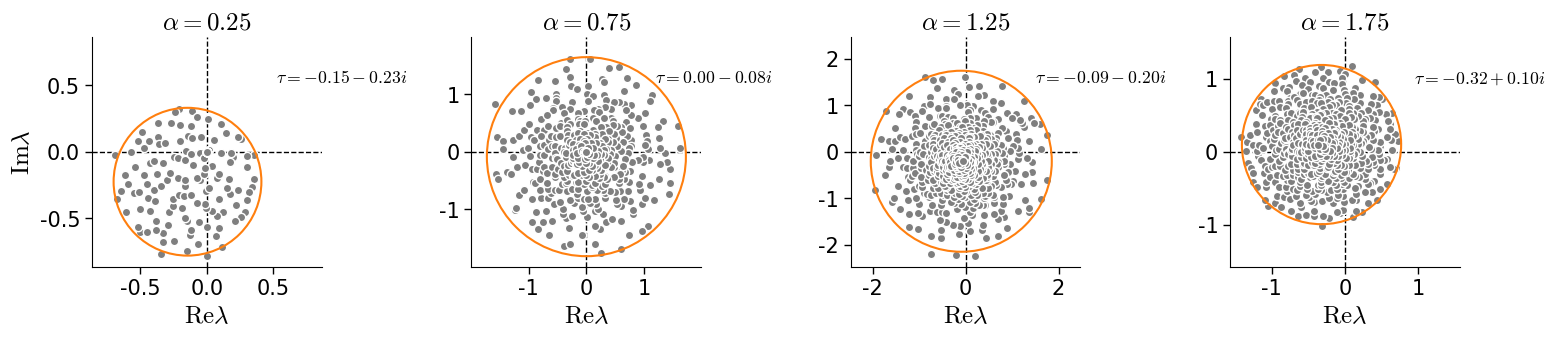

In [5]:
ALPHAs = [0.25, 0.75, 1.25, 1.75]
fig, s = plt.subplots(1, len(ALPHAs), figsize=(4*len(ALPHAs), 4))
for i in range(len(ALPHAs)):
    N = 500
    P = int(ALPHAs[i]*N)
    alpha = P/N
    beta = np.maximum(alpha, 1/alpha)
    
    mu = np.zeros(4)
    V = utils.sample_2d_complex(N, P, mu).astype('complex')
    assert V.shape == (N*P, 2)
    s1 = np.std(V[:, 0])*math.sqrt(N)
    s2 = np.std(V[:, 1])*math.sqrt(N)
    tau = np.corrcoef(V.T)[0, 1]
    assert V.shape == (N*P, 2)

    R0 = V[:,0].reshape(N, P)
    R1 = V[:,1].reshape(N, P)
    X = R0@np.linalg.pinv(R1)
    z = np.linalg.eigvals(X)

    cx = s[i]
    plot.show_complex_spectrum(cx, z, [s1/s2*np.sqrt((1-np.abs(tau)**2)/(beta-1)), s1/s2*np.sqrt((1-np.abs(tau)**2)/(beta-1))], 
    center=[np.real(tau)*s1/s2, np.imag(tau)*s1/s2])
    cx.set_title('$\\alpha=%1.2f$'%alpha)
    plot.text(cx, 0.8, 0.8, '$\\tau=%1.2f%+1.2fi$'%(np.real(tau), np.imag(tau)), fontsize='xx-small')

    if i == 0:
        cx.set_ylabel('$\\mathrm{Im}\\lambda$')
    else:
        cx.set_ylabel('')